NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp'

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords

In [9]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text

def alone(df):
    print('Are you alone?')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        words = row.split() #j is array of string
        cleaned = [word for word in words if len(word) > 1]
        cleaned_string = " ".join(cleaned)
        df['cleaned1'].iloc[i] = cleaned_string
        i += 1
    print('done cleaning alone')
    return df['cleaned1']

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [30]:
df_all = pd.read_csv("./TestNLP_labeled_lstm.csv")
#df_all = pd.read_csv("./df_y4s2_final_new.csv")
df_org = df_all[df_all['relevant'] == True]

df_c = pd.read_csv("./Natt48.csv") #have chad chat 48 true entries
df_c1 = pd.concat([df_org,df_c])
df_c1['Chadchad'] = df_c1['Chadchad'].fillna('no')
df_c1 = df_c1.drop_duplicates(subset='tweet_text', keep='last')
#df_org = df_c


In [29]:
df_all.columns

Index(['index', 'username', 'tweet_id', 'tweet_text', 'org', 'relevant',
       'category', 'query', 'datetime_of_tweet', 'datetime_of_query', 'link',
       'mentioned_location', 'location', 'image'],
      dtype='object')

In [28]:
df_c1.columns

Index(['index', 'username', 'tweet_id', 'tweet_text', 'org', 'relevant',
       'category', 'query', 'datetime_of_tweet', 'datetime_of_query', 'link',
       'mentioned_location', 'location', 'image', 'translated_text',
       'org_step_1', 'org_step_2', 'Chadchad'],
      dtype='object')

In [27]:
df_c.columns

Index(['index', 'username', 'tweet_id', 'tweet_text', 'translated_text',
       'org_step_1', 'org_step_2', 'relevant', 'category', 'query',
       'datetime_of_tweet', 'datetime_of_query', 'link', 'mentioned_location',
       'location', 'image', 'Chadchad'],
      dtype='object')

In [24]:
df_org['org']

0      department of public work
1              police department
2      department of public work
3      department of public work
4               municipal office
                 ...            
96     department of public work
97             police department
98              municipal office
538             municipal office
548             municipal office
Name: org, Length: 101, dtype: object

In [20]:
df_org['org'].value_counts() 

Series([], Name: count, dtype: int64)

In [19]:
df_all['org'].value_counts() 

org
department of public work    53
municipal office             31
police department            17
Name: count, dtype: int64

In [15]:
df_all['org_step_1'].value_counts() #org can only be English

org_step_1
สนง.โยธา             119
สนง.เทศกิจ            91
สนง.ตำรวจแห่งชาติ     61
Name: count, dtype: int64

In [5]:
df_a = df_org
                
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) 
df_a['cleaned'] = alone(df_a)
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1)


#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''

C:\Users\natkn\AppData\Local\Temp\ipykernel_13244\2482613414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
C:\Users\natkn\AppData\Local\Temp\ipykernel_13244\2482613414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
C:\Users\natkn\AppData\Local\Temp\ipykernel_13244\2482613414.py:5: SettingWithCopyWarnin

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [69]:
df_a

,index,username,tweet_id,tweet_text,org,relevant,category,query,datetime_of_tweet,datetime_of_query,link,mentioned_location,location,image,split_text,combined,cleaned,split_cleaned,word_length
0,40,dohyunjinmin,1723873392980578712,เคยเดินจาก bts วัดพระศรีฯไปสายสีแดงหลักสี่ ระย...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-11-13 1:20:19,2023-11-16 15:25:10,https://twitter.com/dohyunjinmin/status/172387...,พระนคร,0.0,[],"[เคย, เดิน, จาก, bts, วัด, พระ, ศรี, ฯ, ไป, สา...",เคย เดิน จาก bts วัด พระ ศรี ฯ ไป สาย สีแดง หล...,เดิน bts วัด พระ ศรี สาย สีแดง หลัก สี่ ระยะทา...,"[เดิน, bts, วัด, พระ, ศรี, สาย, สีแดง, หลัก, ส...",31
1,48,Simmons37496127,1723769675656679557,เคยเดินจากเซนทรัลลาดพร้าวไปพหลโยธิน 34 คือไม่...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",2023-11-12 18:28:11,2023-11-16 14:52:12,https://twitter.com/Simmons37496127/status/172...,ลาดพร้าว,NaN,[],"[เคย, เดิน, จาก, เซ, นท, รัล, ลาดพร้าว, ไป, พห...",เคย เดิน จาก เซ นท รัล ลาดพร้าว ไป พหลโยธิน 34...,เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อา...,"[เดิน, เซ, นท, รัล, ลาดพร้าว, พหลโยธิน, 34, ไห...",27
2,56,xbiiryxxn,1723707515551314342,เคยเดินจากห้วยขวางไปสุทธิสาร สรุปเดินเหยียบฟุต...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 14:21:11,2023-11-16 15:20:42,https://twitter.com/xbiiryxxn/status/172370751...,ห้วยขวาง,NaN,[],"[เคย, เดิน, จาก, ห้วยขวาง, ไป, สุทธิ, สาร, สรุ...",เคย เดิน จาก ห้วยขวาง ไป สุทธิ สาร สรุป เดิน เ...,เดิน ห้วยขวาง สุทธิ สาร สรุป เดิน เหยียบ ฟุตบา...,"[เดิน, ห้วยขวาง, สุทธิ, สาร, สรุป, เดิน, เหยีย...",19
3,62,BAROCTARISREAL,1723676568256680410,อยู่เกาหลีเดินสะบัด แดกเท่าไหรก็ นน ไม่ขึ้น กล...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 12:18:12,2023-11-16 15:20:42,https://twitter.com/BAROCTARISREAL/status/1723...,ห้วยขวาง,NaN,[],"[อยู่, เกาหลี, เดิน, สะบัด, แดก, เท่า, ไห, ร, ...",อยู่ เกาหลี เดิน สะบัด แดก เท่า ไห ร ก็ นน ไม่...,เกาหลี เดิน สะบัด แดก ไห ร นน กลับมา ไทย เดิน ...,"[เกาหลี, เดิน, สะบัด, แดก, ไห, ร, นน, กลับมา, ...",36
4,68,ssssxsaii,1723591895224656205,บรรทัดทองจะน่าเดินกว่านี้ถ้า\n-ทำทางเดินใหม่ไม...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",2023-11-12 6:41:45,2023-11-16 15:43:02,https://twitter.com/ssssxsaii/status/172359189...,บรรทัดทอง,NaN,[],"[บรรทัด, ทอง, จะ, น่า, เดิน, กว่า, นี้, ถ้า, \...",บรรทัด ทอง จะ น่า เดิน กว่า นี้ ถ้า \n - ทำ ทา...,บรรทัด ทอง เดิน ทำ ทางเดิน แผ่น พื้น กระดก ท่อ...,"[บรรทัด, ทอง, เดิน, ทำ, ทางเดิน, แผ่น, พื้น, ก...",30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1003,noknok169,1701508987211116570,มีคนบอกว่าส่วนที่เป็นสีเหลืองมีลักษณะขรุขระแบบ...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ราช...",2023-09-12 8:12:09,2023-11-16 16:06:14,https://twitter.com/noknok169/status/170150898...,รามคำแหง,NaN,[],"[มี, คน, บอ, กว่า, ส่วน, ที่, เป็น, สีเหลือง, ...",มี คน บอ กว่า ส่วน ที่ เป็น สีเหลือง มี ลักษณะ...,คน บอ สีเหลือง ลักษณะ ขรุขระ แบบนี้ ทางเดิน ฟุ...,"[คน, บอ, สีเหลือง, ลักษณะ, ขรุขระ, แบบนี้, ทาง...",24
97,1005,Poor__cherry,1701501439196184947,ห้วยขวางบ่อย ทั้งจีนทั้งไทยขับรถตัวเฮียเกินขึ้...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-09-12 7:42:10,2023-11-16 15:20:42,https://twitter.com/Poor__cherry/status/170150...,ห้วยขวาง,NaN,[],"[ห้วยขวาง, บ่อย, ทั้ง, จีน, ทั้ง, ไทย, ขับรถ, ...",ห้วยขวาง บ่อย ทั้ง จีน ทั้ง ไทย ขับรถ ตัว เฮีย...,ห้วยขวาง จีน ไทย ขับรถ ตัว เฮีย จอด ฟุตบาท,"[ห้วยขวาง, จีน, ไทย, ขับรถ, ตัว, เฮีย, จอด, ฟุ...",8
98,1008,UncleHamzter,1701441389853307124,รีวิว แจ้งวิ่งบนฟุตบาท แจ้งไปกว่า 50 เคส เพิ่ง...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-09-12 3:43:33,2023-11-16 15:25:10,https://twitter.com/UncleHamzter/status/170144...,คล

In [78]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

C:\Users\natkn\AppData\Local\Temp\ipykernel_15716\1034605477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['word_length'] = df_a['split_cleaned'].str.len()


In [79]:
df_a

,index,username,tweet_id,tweet_text,org,relevant,category,query,datetime_of_tweet,datetime_of_query,link,mentioned_location,location,image,split_text,combined,cleaned,split_cleaned,word_length
0,40,dohyunjinmin,1723873392980578712,เคยเดินจาก bts วัดพระศรีฯไปสายสีแดงหลักสี่ ระย...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-11-13 1:20:19,2023-11-16 15:25:10,https://twitter.com/dohyunjinmin/status/172387...,พระนคร,0.0,[],"[เคย, เดิน, จาก, bts, วัด, พระ, ศรี, ฯ, ไป, สา...",เคย เดิน จาก bts วัด พระ ศรี ฯ ไป สาย สีแดง หล...,เดิน bts วัด พระ ศรี สาย สีแดง หลัก สี่ ระยะทา...,"[เดิน, bts, วัด, พระ, ศรี, สาย, สีแดง, หลัก, ส...",31
1,48,Simmons37496127,1723769675656679557,เคยเดินจากเซนทรัลลาดพร้าวไปพหลโยธิน 34 คือไม่...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",2023-11-12 18:28:11,2023-11-16 14:52:12,https://twitter.com/Simmons37496127/status/172...,ลาดพร้าว,NaN,[],"[เคย, เดิน, จาก, เซ, นท, รัล, ลาดพร้าว, ไป, พห...",เคย เดิน จาก เซ นท รัล ลาดพร้าว ไป พหลโยธิน 34...,เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อา...,"[เดิน, เซ, นท, รัล, ลาดพร้าว, พหลโยธิน, 34, ไห...",27
2,56,xbiiryxxn,1723707515551314342,เคยเดินจากห้วยขวางไปสุทธิสาร สรุปเดินเหยียบฟุต...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 14:21:11,2023-11-16 15:20:42,https://twitter.com/xbiiryxxn/status/172370751...,ห้วยขวาง,NaN,[],"[เคย, เดิน, จาก, ห้วยขวาง, ไป, สุทธิ, สาร, สรุ...",เคย เดิน จาก ห้วยขวาง ไป สุทธิ สาร สรุป เดิน เ...,เดิน ห้วยขวาง สุทธิ สาร สรุป เดิน เหยียบ ฟุตบา...,"[เดิน, ห้วยขวาง, สุทธิ, สาร, สรุป, เดิน, เหยีย...",19
3,62,BAROCTARISREAL,1723676568256680410,อยู่เกาหลีเดินสะบัด แดกเท่าไหรก็ นน ไม่ขึ้น กล...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 12:18:12,2023-11-16 15:20:42,https://twitter.com/BAROCTARISREAL/status/1723...,ห้วยขวาง,NaN,[],"[อยู่, เกาหลี, เดิน, สะบัด, แดก, เท่า, ไห, ร, ...",อยู่ เกาหลี เดิน สะบัด แดก เท่า ไห ร ก็ นน ไม่...,เกาหลี เดิน สะบัด แดก ไห ร นน กลับมา ไทย เดิน ...,"[เกาหลี, เดิน, สะบัด, แดก, ไห, ร, นน, กลับมา, ...",36
4,68,ssssxsaii,1723591895224656205,บรรทัดทองจะน่าเดินกว่านี้ถ้า\n-ทำทางเดินใหม่ไม...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",2023-11-12 6:41:45,2023-11-16 15:43:02,https://twitter.com/ssssxsaii/status/172359189...,บรรทัดทอง,NaN,[],"[บรรทัด, ทอง, จะ, น่า, เดิน, กว่า, นี้, ถ้า, \...",บรรทัด ทอง จะ น่า เดิน กว่า นี้ ถ้า \n - ทำ ทา...,บรรทัด ทอง เดิน ทำ ทางเดิน แผ่น พื้น กระดก ท่อ...,"[บรรทัด, ทอง, เดิน, ทำ, ทางเดิน, แผ่น, พื้น, ก...",30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1003,noknok169,1701508987211116570,มีคนบอกว่าส่วนที่เป็นสีเหลืองมีลักษณะขรุขระแบบ...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ราช...",2023-09-12 8:12:09,2023-11-16 16:06:14,https://twitter.com/noknok169/status/170150898...,รามคำแหง,NaN,[],"[มี, คน, บอ, กว่า, ส่วน, ที่, เป็น, สีเหลือง, ...",มี คน บอ กว่า ส่วน ที่ เป็น สีเหลือง มี ลักษณะ...,คน บอ สีเหลือง ลักษณะ ขรุขระ แบบนี้ ทางเดิน ฟุ...,"[คน, บอ, สีเหลือง, ลักษณะ, ขรุขระ, แบบนี้, ทาง...",24
97,1005,Poor__cherry,1701501439196184947,ห้วยขวางบ่อย ทั้งจีนทั้งไทยขับรถตัวเฮียเกินขึ้...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-09-12 7:42:10,2023-11-16 15:20:42,https://twitter.com/Poor__cherry/status/170150...,ห้วยขวาง,NaN,[],"[ห้วยขวาง, บ่อย, ทั้ง, จีน, ทั้ง, ไทย, ขับรถ, ...",ห้วยขวาง บ่อย ทั้ง จีน ทั้ง ไทย ขับรถ ตัว เฮีย...,ห้วยขวาง จีน ไทย ขับรถ ตัว เฮีย จอด ฟุตบาท,"[ห้วยขวาง, จีน, ไทย, ขับรถ, ตัว, เฮีย, จอด, ฟุ...",8
98,1008,UncleHamzter,1701441389853307124,รีวิว แจ้งวิ่งบนฟุตบาท แจ้งไปกว่า 50 เคส เพิ่ง...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-09-12 3:43:33,2023-11-16 15:25:10,https://twitter.com/UncleHamzter/status/170144...,คล

In [80]:
df_a['word_length'].sort_values(ascending=False) 

43     44
55     43
23     42
548    41
6      41
       ..
20     10
94     10
66     10
97      8
72      8
Name: word_length, Length: 101, dtype: int64

In [85]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import SpatialDropout1D

MAX_WORDS = 2000 #memmorized words
MAX_SEQUENCE_LENGTH = 44
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df_a.cleaned.values)
word_index = tokenizer.word_index
X = tokenizer.texts_to_sequences(df_a.cleaned.values)

In [86]:
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
Y = pd.get_dummies(df_a['org']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [92]:
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1)) #0.2   Loss: 1.231  Accuracy: 0.419
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
batch_size = 32

early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=[early_stopping])


Epoch 1/150
2/2 [==============================] - 6s 625ms/step - loss: 1.0087 - accuracy: 0.5397 - val_loss: 0.9492 - val_accuracy: 0.5714
Epoch 2/150
2/2 [==============================] - 0s 100ms/step - loss: 1.0036 - accuracy: 0.5397 - val_loss: 0.9410 - val_accuracy: 0.5714
Epoch 3/150
2/2 [==============================] - 0s 100ms/step - loss: 0.9999 - accuracy: 0.5397 - val_loss: 0.9298 - val_accuracy: 0.5714
Epoch 4/150
2/2 [==============================] - 0s 106ms/step - loss: 0.9905 - accuracy: 0.5397 - val_loss: 0.9158 - val_accuracy: 0.5714
Epoch 5/150
2/2 [==============================] - 0s 117ms/step - loss: 0.9811 - accuracy: 0.5397 - val_loss: 0.8965 - val_accuracy: 0.5714
Epoch 6/150
2/2 [==============================] - 0s 114ms/step - loss: 0.9668 - accuracy: 0.5397 - val_loss: 0.8743 - val_accuracy: 0.5714
Epoch 7/150
2/2 [==============================] - 0s 100ms/step - loss: 0.9519 - accuracy: 0.5397 - val_loss: 0.8540 - val_accuracy: 0.5714
Epoch 8/150
2

1/1 [==============================] - 0s 43ms/step - loss: 1.2314 - accuracy: 0.4194
Test set
  Loss: 1.231
  Accuracy: 0.419
1/1 [==============================] - 1s 539ms/step


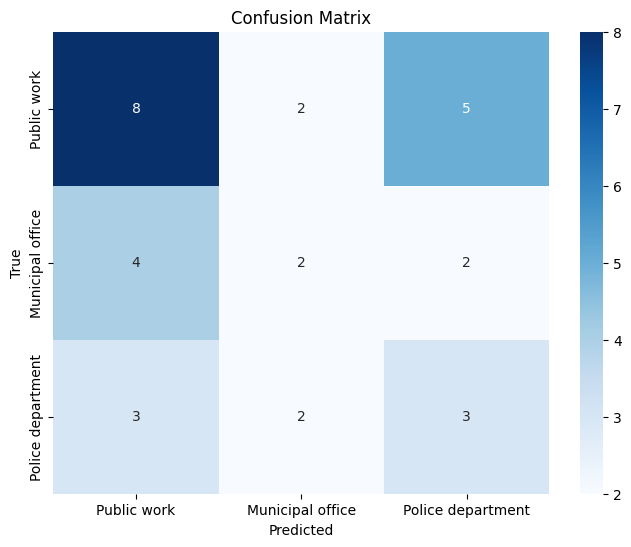

In [93]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Public work', 'Municipal office', 'Police department'], 
            yticklabels=['Public work', 'Municipal office', 'Police department'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [94]:
#! pip install gensim
#! pip install pythainlp
from pythainlp.word_vector import WordVector

wv = WordVector()
sentence = 'อ้วน ร้าวราน'
a = wv.sentence_vectorizer(sentence, use_mean=True)
print(a.shape) #(1, 300)

(1, 300)


In [52]:
model_json = model.to_json()
with open("org_model_architecture.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('org_model_weights.h5')

Using

In [42]:
X_test=['อย่า ลืม ติดตาม ชม รายการ พิเศษ','ด่วน ลด แบบ จัดเต็ม ของแถม มากมาย']
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


array([[0.03899263, 0.03360739, 0.92739993],
       [0.01167417, 0.0186958 , 0.96963006]], dtype=float32)

End.................................................

In [53]:
Y # public work (โยธา), municipal office (เทศกิจ) ,police department

array([[ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [Fa

In [44]:
df_a.cleaned.values[1]

'เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อากาศ กทม เดิน หนัก มอ ไซ ขับ ฟุต บาต เเล้ว เ เร ง เหมือน เกะกะ ทางเดิน อันนี้ แก้'

In [45]:
X.shape #after padding sentence, input

(101, 63)

In [46]:
X #after padding

array([[   0,    0,    0, ...,  156,  113,  114],
       [   0,    0,    0, ...,    4,  115,  159],
       [   0,    0,    0, ...,   88,  417,  418],
       ...,
       [   0,    0,    0, ...,  316,    3, 1040],
       [   0,    0,    0, ...,   55,   51,    2],
       [   0,    0,    0, ..., 1061, 1062,   80]])

In [47]:
X[76] #before padding

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 889, 313,  14,  14, 890, 382,  64, 155, 891,   3, 892, 893,
       208, 894,  41, 895, 130, 896,   1, 216, 355, 897, 294])

In [48]:
tokenizer.word_index

{'เดิน': 1,
 'ฟุตบาท': 2,
 'ทางเท้า': 3,
 'ทางเดิน': 4,
 'ถนน': 5,
 'คน': 6,
 'ร้าน': 7,
 'จอด': 8,
 'รถ': 9,
 'ต้น': 10,
 'บริเวณ': 11,
 'เขต': 12,
 'ทำ': 13,
 'ซอย': 14,
 '1': 15,
 'ม': 16,
 'น้ำ': 17,
 'ทอง': 18,
 'ประตู': 19,
 'งาม': 20,
 'วงศ์วาน': 21,
 'มนุษย์': 22,
 'สังคม': 23,
 'idku': 24,
 'ku': 25,
 'manso': 26,
 'สร้างสรรค์': 27,
 'บรรทัด': 28,
 'เส้น': 29,
 'แถว': 30,
 'ขาย': 31,
 'ชุมชน': 32,
 'แยก': 33,
 'การเปลี่ยนแปลง': 34,
 'kasetsart': 35,
 'เกษตร': 36,
 'โซ': 37,
 'manandsociety': 38,
 '2566': 39,
 'ฝั่ง': 40,
 'ขายของ': 41,
 'แมน': 42,
 'มอ': 43,
 'ไซ': 44,
 'เหมือน': 45,
 'พื้น': 46,
 '2': 47,
 'แจ้ง': 48,
 'ดู': 49,
 'อ่ะ': 50,
 'วาง': 51,
 'อโศก': 52,
 'หลุม': 53,
 '01999141': 54,
 'หลบ': 55,
 'ฝนตก': 56,
 'สะพาน': 57,
 'พัง': 58,
 'สภาพ': 59,
 'เจอ': 60,
 'ติด': 61,
 'ต้นไม้': 62,
 'แคบ': 63,
 'หน้า': 64,
 'หลัก': 65,
 'คลอง': 66,
 'ลาดพร้าว': 67,
 'กทม': 68,
 'ห้วยขวาง': 69,
 'ท่อ': 70,
 'วิ่ง': 71,
 'รู้': 72,
 'เวลา': 73,
 'ชัชชาติ': 74,
 'สายไฟ': 75,
 'ไปมา

In [49]:
df_a.to_csv('./compare1.csv', index=False) # , header=False)

In [25]:
df_a

,index,username,tweet_id,tweet_text,org,relevant,category,query,datetime_of_tweet,datetime_of_query,link,mentioned_location,location,image,split_text,combined,cleaned,split_cleaned,word_length
0,40,dohyunjinmin,1723873392980578712,เคยเดินจาก bts วัดพระศรีฯไปสายสีแดงหลักสี่ ระย...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-11-13 1:20:19,2023-11-16 15:25:10,https://twitter.com/dohyunjinmin/status/172387...,พระนคร,0.0,[],"[เคย, เดิน, จาก, bts, วัด, พระ, ศรี, ฯ, ไป, สา...",เคย เดิน จาก bts วัด พระ ศรี ฯ ไป สาย สีแดง หล...,เดิน bts วัด พระ ศรี สาย สีแดง หลัก สี่ ระยะทา...,"[เดิน, bts, วัด, พระ, ศรี, สาย, สีแดง, หลัก, ส...",31
1,48,Simmons37496127,1723769675656679557,เคยเดินจากเซนทรัลลาดพร้าวไปพหลโยธิน 34 คือไม่...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",2023-11-12 18:28:11,2023-11-16 14:52:12,https://twitter.com/Simmons37496127/status/172...,ลาดพร้าว,NaN,[],"[เคย, เดิน, จาก, เซ, นท, รัล, ลาดพร้าว, ไป, พห...",เคย เดิน จาก เซ นท รัล ลาดพร้าว ไป พหลโยธิน 34...,เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อา...,"[เดิน, เซ, นท, รัล, ลาดพร้าว, พหลโยธิน, 34, ไห...",27
2,56,xbiiryxxn,1723707515551314342,เคยเดินจากห้วยขวางไปสุทธิสาร สรุปเดินเหยียบฟุต...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 14:21:11,2023-11-16 15:20:42,https://twitter.com/xbiiryxxn/status/172370751...,ห้วยขวาง,NaN,[],"[เคย, เดิน, จาก, ห้วยขวาง, ไป, สุทธิ, สาร, สรุ...",เคย เดิน จาก ห้วยขวาง ไป สุทธิ สาร สรุป เดิน เ...,เดิน ห้วยขวาง สุทธิ สาร สรุป เดิน เหยียบ ฟุตบา...,"[เดิน, ห้วยขวาง, สุทธิ, สาร, สรุป, เดิน, เหยีย...",19
3,62,BAROCTARISREAL,1723676568256680410,อยู่เกาหลีเดินสะบัด แดกเท่าไหรก็ นน ไม่ขึ้น กล...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 12:18:12,2023-11-16 15:20:42,https://twitter.com/BAROCTARISREAL/status/1723...,ห้วยขวาง,NaN,[],"[อยู่, เกาหลี, เดิน, สะบัด, แดก, เท่า, ไห, ร, ...",อยู่ เกาหลี เดิน สะบัด แดก เท่า ไห ร ก็ นน ไม่...,เกาหลี เดิน สะบัด แดก ไห ร นน กลับมา ไทย เดิน ...,"[เกาหลี, เดิน, สะบัด, แดก, ไห, ร, นน, กลับมา, ...",36
4,68,ssssxsaii,1723591895224656205,บรรทัดทองจะน่าเดินกว่านี้ถ้า\n-ทำทางเดินใหม่ไม...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",2023-11-12 6:41:45,2023-11-16 15:43:02,https://twitter.com/ssssxsaii/status/172359189...,บรรทัดทอง,NaN,[],"[บรรทัด, ทอง, จะ, น่า, เดิน, กว่า, นี้, ถ้า, \...",บรรทัด ทอง จะ น่า เดิน กว่า นี้ ถ้า \n - ทำ ทา...,บรรทัด ทอง เดิน ทำ ทางเดิน แผ่น พื้น กระดก ท่อ...,"[บรรทัด, ทอง, เดิน, ทำ, ทางเดิน, แผ่น, พื้น, ก...",30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1003,noknok169,1701508987211116570,มีคนบอกว่าส่วนที่เป็นสีเหลืองมีลักษณะขรุขระแบบ...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ราช...",2023-09-12 8:12:09,2023-11-16 16:06:14,https://twitter.com/noknok169/status/170150898...,รามคำแหง,NaN,[],"[มี, คน, บอ, กว่า, ส่วน, ที่, เป็น, สีเหลือง, ...",มี คน บอ กว่า ส่วน ที่ เป็น สีเหลือง มี ลักษณะ...,คน บอ สีเหลือง ลักษณะ ขรุขระ แบบนี้ ทางเดิน ฟุ...,"[คน, บอ, สีเหลือง, ลักษณะ, ขรุขระ, แบบนี้, ทาง...",24
97,1005,Poor__cherry,1701501439196184947,ห้วยขวางบ่อย ทั้งจีนทั้งไทยขับรถตัวเฮียเกินขึ้...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-09-12 7:42:10,2023-11-16 15:20:42,https://twitter.com/Poor__cherry/status/170150...,ห้วยขวาง,NaN,[],"[ห้วยขวาง, บ่อย, ทั้ง, จีน, ทั้ง, ไทย, ขับรถ, ...",ห้วยขวาง บ่อย ทั้ง จีน ทั้ง ไทย ขับรถ ตัว เฮีย...,ห้วยขวาง จีน ไทย ขับรถ ตัว เฮีย จอด ฟุตบาท,"[ห้วยขวาง, จีน, ไทย, ขับรถ, ตัว, เฮีย, จอด, ฟุ...",8
98,1008,UncleHamzter,1701441389853307124,รีวิว แจ้งวิ่งบนฟุตบาท แจ้งไปกว่า 50 เคส เพิ่ง...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-09-12 3:43:33,2023-11-16 15:25:10,https://twitter.com/UncleHamzter/status/170144...,คล